In [1]:
import pandas as pd

path = "project-1-data.csv"
dados = pd.read_csv(path).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [3]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [5]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [7]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [8]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [9]:
modelo

DecisionTreeClassifier(max_depth=2)

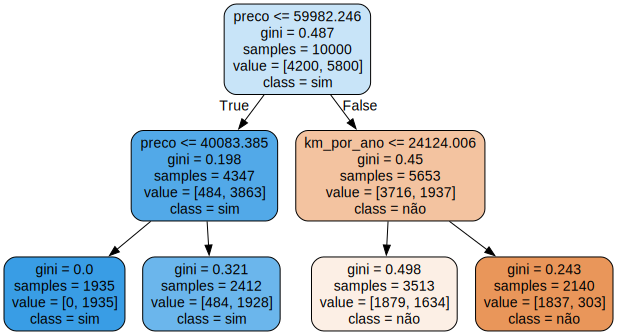

In [10]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                           class_names=["não", "sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

In [11]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


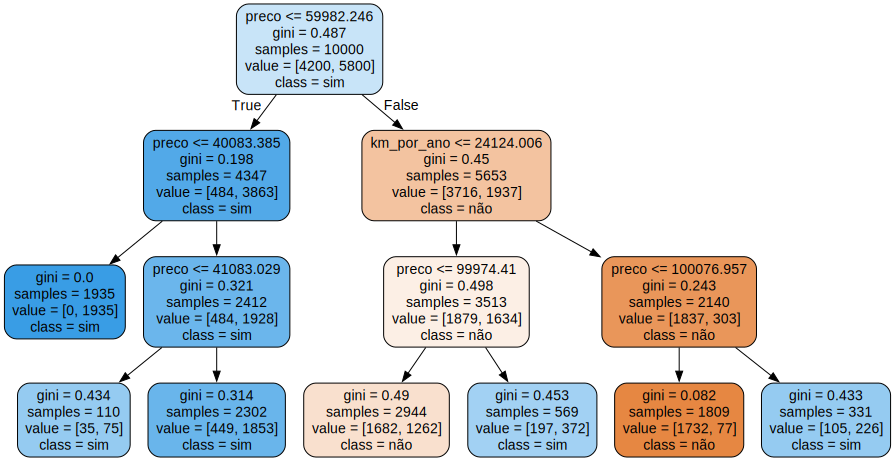

In [12]:
modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                           class_names=["não", "sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

In [13]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


In [14]:
def roda_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean()*100
    test_score = results['test_score'].mean()*100
    print(f"max_depth: {max_depth:2d} | Accuracy treino: {train_score:.2f} | Accuracy teste: {test_score:.2f}")
    tabela = [max_depth, round(train_score, 2), round(test_score, 2)]
    return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1,33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "test"])
resultados

max_depth:  1 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  3 | Accuracy treino: 78.75 | Accuracy teste: 78.67
max_depth:  4 | Accuracy treino: 78.79 | Accuracy teste: 78.63
max_depth:  5 | Accuracy treino: 78.94 | Accuracy teste: 78.56
max_depth:  6 | Accuracy treino: 79.17 | Accuracy teste: 78.12
max_depth:  7 | Accuracy treino: 79.50 | Accuracy teste: 77.96
max_depth:  8 | Accuracy treino: 79.89 | Accuracy teste: 77.86
max_depth:  9 | Accuracy treino: 80.46 | Accuracy teste: 77.38
max_depth: 10 | Accuracy treino: 81.16 | Accuracy teste: 77.19
max_depth: 11 | Accuracy treino: 82.03 | Accuracy teste: 76.97
max_depth: 12 | Accuracy treino: 82.89 | Accuracy teste: 76.49
max_depth: 13 | Accuracy treino: 83.95 | Accuracy teste: 75.81
max_depth: 14 | Accuracy treino: 85.03 | Accuracy teste: 75.66
max_depth: 15 | Accuracy treino: 86.14 | Accuracy teste: 75.16
max_depth: 16 | Accuracy treino: 87.19 | Accuracy teste

,max_depth,train,test
0,1,75.79,75.78
1,2,75.79,75.78
2,3,78.75,78.67
3,4,78.79,78.63
4,5,78.94,78.56
5,6,79.17,78.12
6,7,79.50,77.96
7,8,79.89,77.86
8,9,80.46,77.38
9,10,81.16,77.19


<Axes: xlabel='max_depth', ylabel='train'>

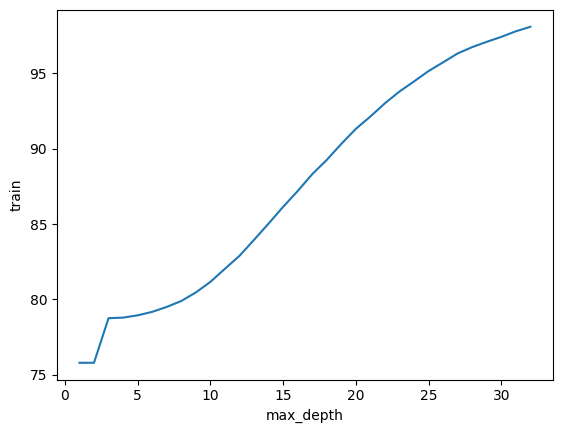

In [15]:
import seaborn as sns

sns.lineplot(x="max_depth", y="train", data=resultados)

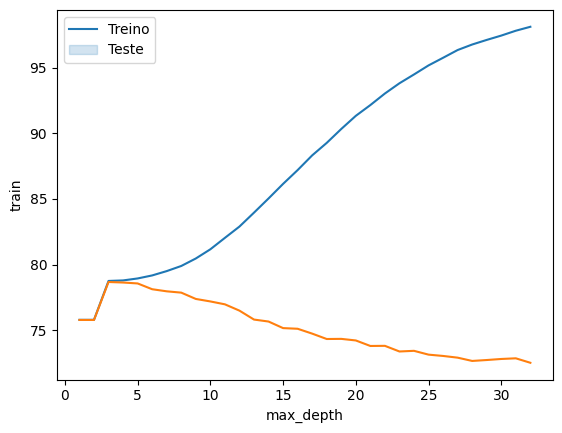

In [16]:
import matplotlib.pyplot as plt

sns.lineplot(x="max_depth", y="train", data=resultados)
sns.lineplot(x="max_depth", y="test", data=resultados)
plt.legend(["Treino", "Teste"])

In [17]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.75,78.67
3,4,78.79,78.63
4,5,78.94,78.56
5,6,79.17,78.12
6,7,79.50,77.96


In [18]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean()*100
    test_score = results['test_score'].mean()*100
    print(f"max_depth: {max_depth:2d} | min_samples_leaf: {min_samples_leaf:3d} | Accuracy treino: {train_score:.2f} | Accuracy teste: {test_score:.2f}")
    tabela = [max_depth, min_samples_leaf, round(train_score, 2), round(test_score, 2)]
    return tabela

def busca():
    resultados = []
    for max_depth in range (1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "test"])
    return resultados

resultados = busca()
resultados

max_depth:  1 | min_samples_leaf:  32 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf:  64 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 128 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 256 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | min_samples_leaf:  32 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | min_samples_leaf:  64 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | min_samples_leaf: 128 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | min_samples_leaf: 256 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  3 | min_samples_leaf:  32 | Accuracy treino: 78.75 | Accuracy teste: 78.67
max_depth:  3 | min_samples_leaf:  64 | Accuracy treino: 78.75 | Accuracy teste: 78.67
max_depth:  3 | min_samples_leaf: 128 | Accuracy treino: 78.75 | Accuracy teste: 78.67
max_depth:  3 | min_samples_leaf: 256 | Acc

,max_depth,min_samples_leaf,train,test
0,1,32,75.79,75.78
1,1,64,75.79,75.78
2,1,128,75.79,75.78
3,1,256,75.79,75.78
4,2,32,75.79,75.78
...,...,...,...,...
123,31,256,78.90,77.85
124,32,32,80.89,76.84
125,32,64,79.79,77.30
126,32,128,79.21,78.22


In [19]:
resultados.sort_values("test", ascending=False).head(10)

,max_depth,min_samples_leaf,train,test
15,4,256,78.75,78.67
12,4,32,78.75,78.67
14,4,128,78.75,78.67
13,4,64,78.75,78.67
8,3,32,78.75,78.67
9,3,64,78.75,78.67
10,3,128,78.75,78.67
11,3,256,78.75,78.67
16,5,32,78.82,78.50
17,5,64,78.79,78.45


In [20]:
corr = resultados.corr().round(3)

<Axes: >

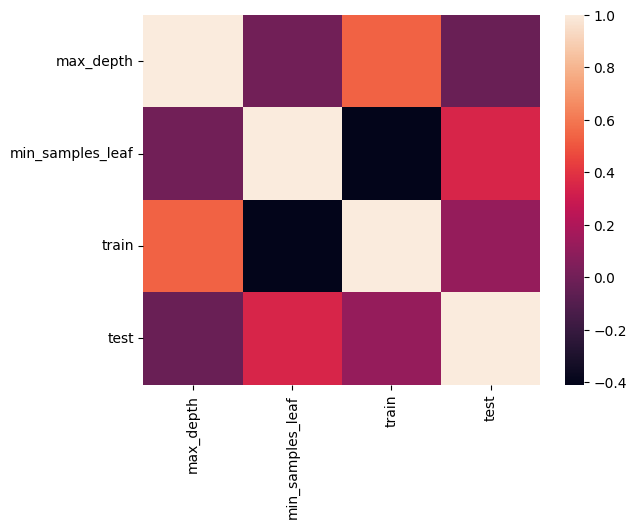

In [21]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

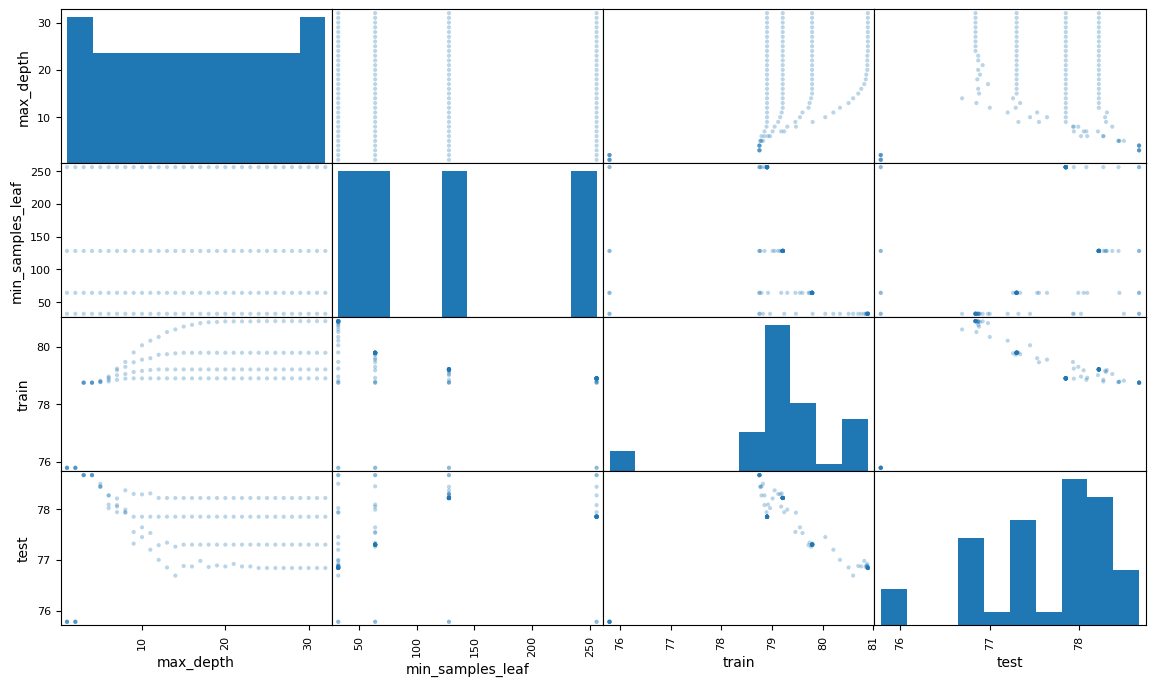

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(resultados, figsize=(14,8), alpha=0.3)

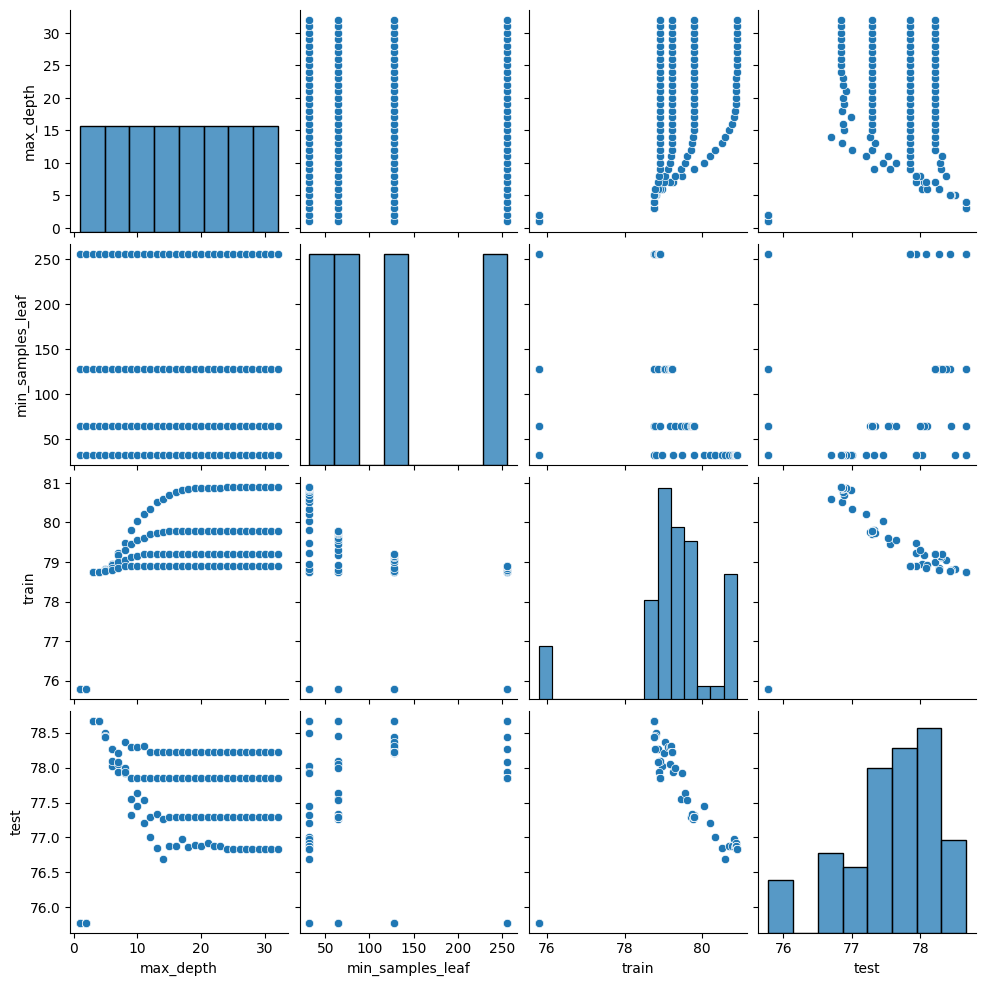

In [23]:
sns.pairplot(resultados)

<Axes: >

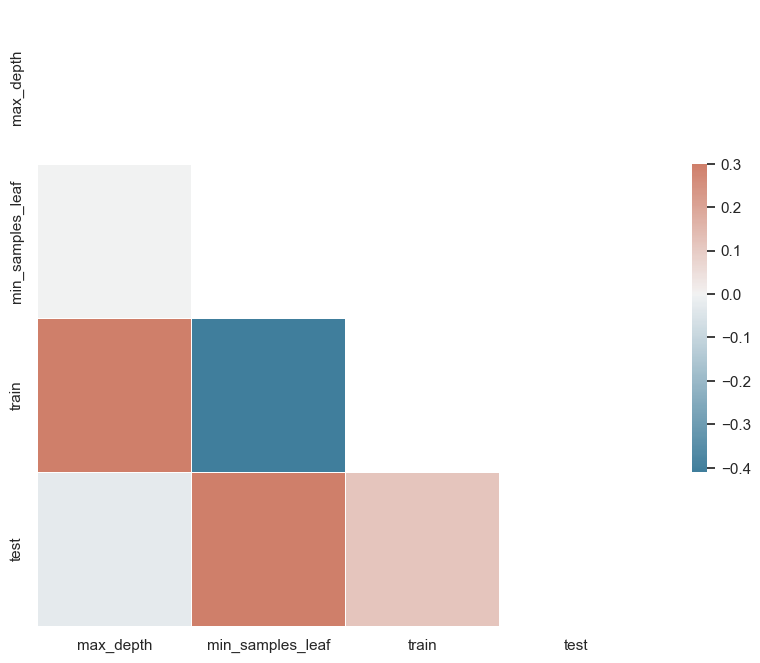

In [24]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
# Após verificar uma correlação positiva entre "test" e "min_samples_leaf", vamos rodar novamente com valores maiores de "min_samples_leaf"

def busca():
    resultados = []
    for max_depth in range (1,33):
        for min_samples_leaf in [128, 192, 256, 512]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "test"])
    return resultados

resultados = busca()
resultados

max_depth:  1 | min_samples_leaf: 128 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 192 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 256 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 512 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | min_samples_leaf: 128 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | min_samples_leaf: 192 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | min_samples_leaf: 256 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  2 | min_samples_leaf: 512 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  3 | min_samples_leaf: 128 | Accuracy treino: 78.75 | Accuracy teste: 78.67
max_depth:  3 | min_samples_leaf: 192 | Accuracy treino: 78.75 | Accuracy teste: 78.67
max_depth:  3 | min_samples_leaf: 256 | Accuracy treino: 78.75 | Accuracy teste: 78.67
max_depth:  3 | min_samples_leaf: 512 | Acc

,max_depth,min_samples_leaf,train,test
0,1,128,75.79,75.78
1,1,192,75.79,75.78
2,1,256,75.79,75.78
3,1,512,75.79,75.78
4,2,128,75.79,75.78
...,...,...,...,...
123,31,512,77.53,77.50
124,32,128,79.21,78.22
125,32,192,79.01,78.05
126,32,256,78.90,77.85


<Axes: >

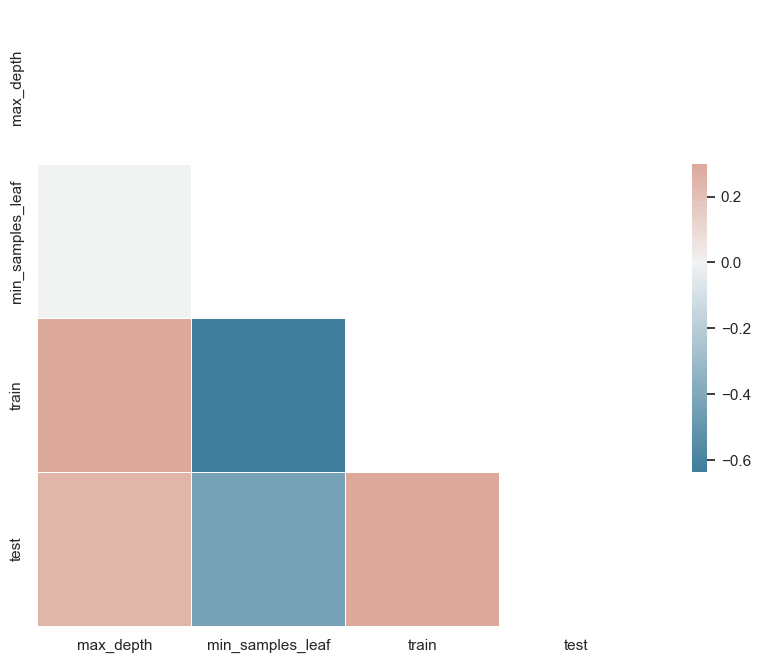

In [26]:
corr = resultados.corr().round(3)

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
resultados.sort_values("test", ascending=False).head(10)

,max_depth,min_samples_leaf,train,test
13,4,192,78.75,78.67
8,3,128,78.75,78.67
9,3,192,78.75,78.67
10,3,256,78.75,78.67
14,4,256,78.75,78.67
12,4,128,78.75,78.67
16,5,128,78.77,78.44
18,5,256,78.77,78.44
17,5,192,78.77,78.44
28,8,128,79.05,78.37


In [28]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split= min_samples_split)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    fit_time = results["fit_time"].mean()
    score_time = results["score_time"].mean()    
    train_score = results['train_score'].mean()*100
    test_score = results['test_score'].mean()*100
    print(f"max_depth: {max_depth:2d} | min_samples_leaf: {min_samples_leaf:3d} | min_samples_split: {min_samples_split:3d} | Accuracy treino: {train_score:.2f} | Accuracy teste: {test_score:.2f}")
    tabela = [max_depth, min_samples_leaf, min_samples_split, round(train_score, 2), round(test_score, 2), fit_time, score_time]
    return tabela

def busca():
    resultados = []
    for max_depth in range (1,11):
        for min_samples_leaf in [128, 192, 256]:
            for min_samples_split in [32, 64, 128, 256]:
                tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "min_samples_split", "train", "test", "fit_time", "score_time"])
    return resultados

resultados = busca()
resultados

max_depth:  1 | min_samples_leaf: 128 | min_samples_split:  32 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 128 | min_samples_split:  64 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 128 | min_samples_split: 128 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 128 | min_samples_split: 256 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 192 | min_samples_split:  32 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 192 | min_samples_split:  64 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 192 | min_samples_split: 128 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 192 | min_samples_split: 256 | Accuracy treino: 75.79 | Accuracy teste: 75.78
max_depth:  1 | min_samples_leaf: 256 | min_samples_split:  32 | Accuracy treino: 75.79 | Accuracy teste

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,128,32,75.79,75.78,0.010792,0.003199
1,1,128,64,75.79,75.78,0.010392,0.002399
2,1,128,128,75.79,75.78,0.009793,0.002199
3,1,128,256,75.79,75.78,0.009394,0.002298
4,1,192,32,75.79,75.78,0.011192,0.003299
...,...,...,...,...,...,...,...
115,10,192,256,79.01,78.05,0.035679,0.002298
116,10,256,32,78.90,77.85,0.031481,0.002398
117,10,256,64,78.90,77.85,0.031681,0.002497
118,10,256,128,78.90,77.85,0.032380,0.002599


<Axes: >

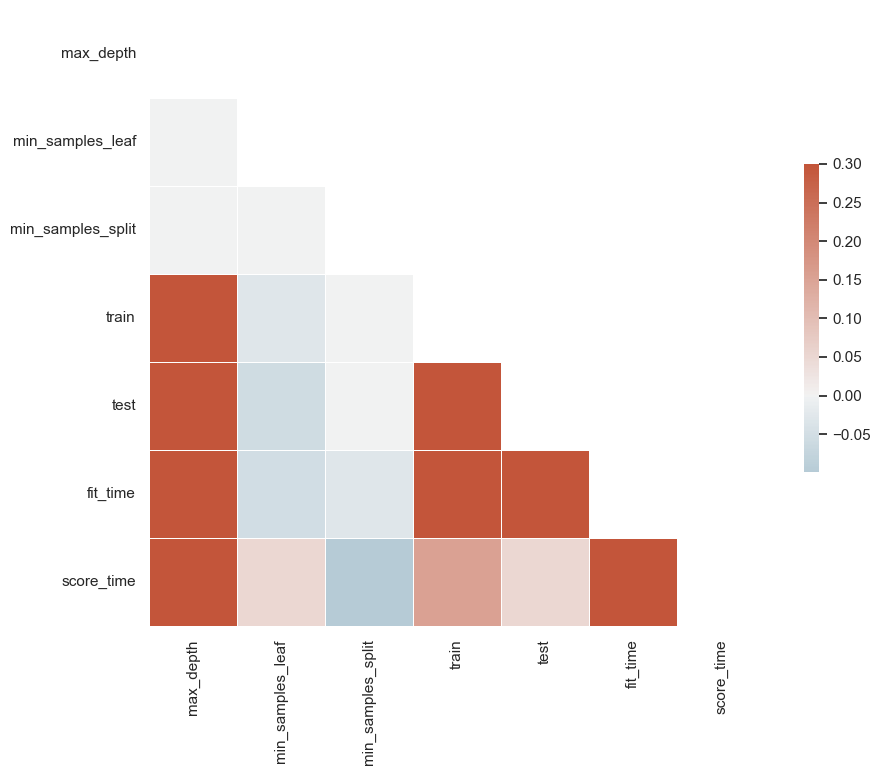

In [29]:
corr = resultados.corr().round(3)

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
resultados.sort_values("test", ascending=False).head(10)

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
47,4,256,256,78.75,78.67,0.025084,0.002698
36,4,128,32,78.75,78.67,0.024784,0.002499
26,3,128,128,78.75,78.67,0.021387,0.002398
27,3,128,256,78.75,78.67,0.021087,0.002399
28,3,192,32,78.75,78.67,0.021088,0.002398
30,3,192,128,78.75,78.67,0.020586,0.002399
31,3,192,256,78.75,78.67,0.020187,0.002399
32,3,256,32,78.75,78.67,0.019888,0.002499
33,3,256,64,78.75,78.67,0.019788,0.002598
34,3,256,128,78.75,78.67,0.019588,0.002599


In [31]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_paramentros = {
    "max_depth": [3,5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(
    DecisionTreeClassifier(),
    espaco_de_paramentros,
    cv= GroupKFold(n_splits=10))
busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030781,0.010375,0.004697,0.002099,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.027783,0.004726,0.003698,0.001004,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.025283,0.002898,0.003099,0.001044,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.022186,0.001599,0.002998,0.000894,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.024384,0.005478,0.002900,0.000830,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [32]:
print(busca.best_params_)
print(busca.best_score_*100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [33]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [34]:
from sklearn.metrics import accuracy_score

# Evitar essa abordagem pois pode ser muito otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print(f"Accuracy para os dado foi de {accuracy:.2f}%")

Accuracy para os dado foi de 78.75%


No caso de cross validation com busca de hiper paramentros, fazemos uma nova validaçao cruzada. Chama-se nested cross validation

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=GroupKFold(n_splits=10), groups=dados.modelo)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py", line 1419, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py", line 857, in evaluate_candidates
    for (cand_idx, parameters), (split_idx, (train, test)) in product(
                                                              ^^^^^^^^
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py", line 377, in split
    for train, test in super().split(X, y, groups):
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py", line 108, in split
    for test_index in self._iter_test_masks(X, y, groups):
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py", line 120, in _iter_test_masks
    for test_index in self._iter_test_indices(X, y, groups):
  File "c:\Users\Gustavo S Schultz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py", line 555, in _iter_test_indices
    raise ValueError("The 'groups' parameter should not be None.")
ValueError: The 'groups' parameter should not be None.


Infelizmente, como o Pandas nao suporta nested validation com group kfold nao conseguimos prever o resultado para novos grupos

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_paramentros = {
    "max_depth": [3,5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(
    DecisionTreeClassifier(),
    espaco_de_paramentros,
    cv= KFold(n_splits=5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024192,0.003179,0.003594,0.000487,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.021586,0.000799,0.002998,0.001096,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.021787,0.000400,0.003399,0.000490,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.021786,0.000398,0.002598,0.000799,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.020787,0.000400,0.003999,0.000895,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [40]:
def imprime_scores(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [41]:
imprime_scores(scores)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


In [42]:
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

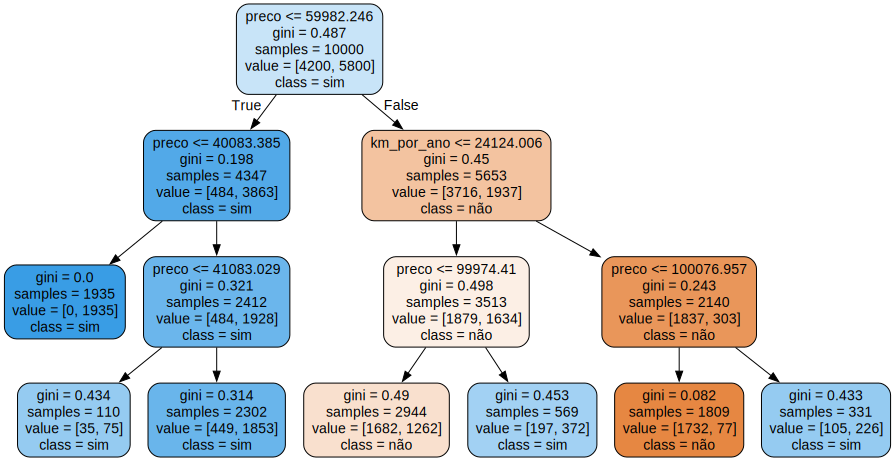

In [43]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                           class_names=["não", "sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph